# Companies side
### Classification with SVC and Logistic Regression

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC,LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_excel('merged_final.xlsx')
#df.drop(['Unnamed: 8'],axis = 1, inplace = True)
df.dropna(axis=0, inplace = True)
#df

In [4]:
df = df[df['raised_amount']<=2e8]

In [5]:
df['offering_ratio'] = df['offered_number']/df['total_number']

In [6]:
df['asset_class_ML'] = LabelEncoder().fit_transform(df['asset_class'])
df['class_ML'] = LabelEncoder().fit_transform(df['class'])
#df

In [7]:
df_sel = df[['class_ML', 'raised_amount', 'offered_number', 'offering_ratio']]
df_target = df['asset_class_ML']
#1 for crypto 0 for IPO

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_sel, df_target, test_size=0.3,random_state=150)

In [9]:
# modify here to set how the model should punish the missclissified value
# hyper parameter C
pen = 1e4

In [10]:
classifier = svm.SVC(kernel='rbf',C=pen)
classifier.fit(X_train, y_train)

SVC(C=10000.0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9261744966442953


In [13]:
print('===================')
print('size of testing set @ 30% of total size:   {}'.format(len(X_test)))
print('size of training set @ 70% of total size:   {}'.format(len(X_train)))
print('===================')

size of testing set @ 30% of total size:   298
size of training set @ 70% of total size:   693


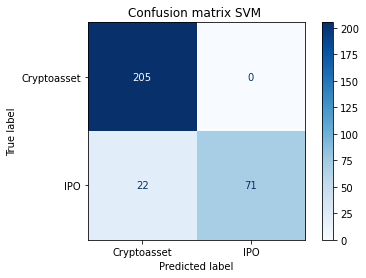

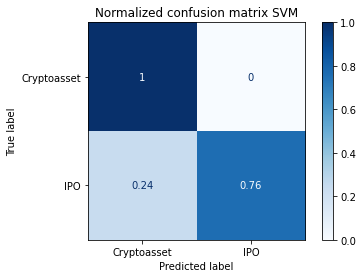

In [14]:
# Source https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# adapted to my code

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix SVM ", None),
                  ("Normalized confusion matrix SVM", 'true')]
for title, normalizer in titles_options:
    
    disp = metrics.plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['Cryptoasset','IPO'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalizer)
    disp.ax_.set_title(title)
    plt.savefig('images/{}.png'.format(title),  dpi=900,  transparent=True)
    plt.savefig('images/{}.jpeg'.format(title),  dpi=900)
    
    

plt.show()

In [15]:
Decision_Function = classifier.decision_function(X_test)
#Decision_Function

In [16]:
classifier.intercept_[0]

0.6957588067387601

In [17]:
#classifier.support_vectors_
#classifier.decision_function(X_test)

### Logistic Regression

In [18]:
LogiR = LogisticRegression(C=1, random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)


y_pred=LogiR.predict(X_test)

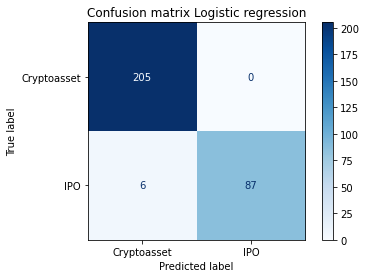

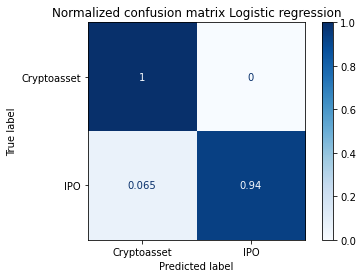

In [19]:
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix Logistic regression", None),
                  ("Normalized confusion matrix Logistic regression", 'true')]
for title, normalizer in titles_options:
    
    disp = metrics.plot_confusion_matrix(LogiR, X_test, y_test,
                                 display_labels=['Cryptoasset','IPO'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalizer)
    disp.ax_.set_title(title)
    plt.savefig('images/{}.png'.format(title),  dpi=900,  transparent=True)
    plt.savefig('images/{}.jpeg'.format(title),  dpi=900)
    
    

plt.show()